In [184]:
import glob
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn.metrics as metrics

from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate, Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [3]:
# where am i?
%pwd

'C:\\Users\\david\\Documents\\ImageNet'

In [4]:
flowers = glob.glob('./data/flr_*.jpg')
fungus = glob.glob('./data/fgs_*.jpg')
rocks = glob.glob('./data/rck_*.jpg')

pixel_flowers = glob.glob('./data/pxl_flower_*.jpeg')
pixel_umbrella = glob.glob('./data/pxl_umbrella_*.jpeg')
print("There are %s, %s flower, %s fungus, %s rock and %s umbrella pictures" %(len(flowers), len(pixel_flowers), len(fungus), len(rocks), len(pixel_umbrella)))

There are 1280, 1850 flower, 856 fungus, 1009 rock and 422 umbrella pictures


Showing: ./data\flr_01672.jpg


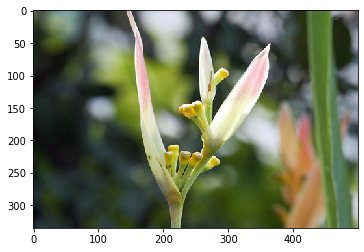

Showing: ./data\flr_01377.jpg


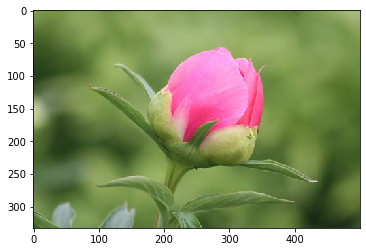

Showing: ./data\flr_01566.jpg


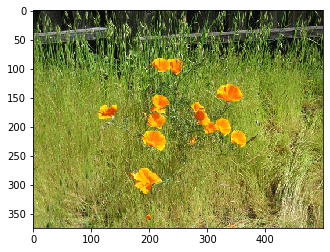

Showing: ./data\flr_00087.jpg


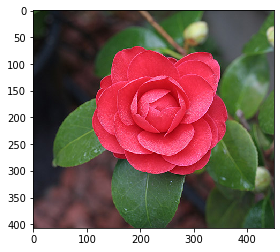

Showing: ./data\flr_00115.jpg


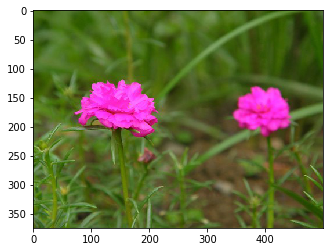

In [66]:
# Randomly show 10 examples of the images
from IPython.display import Image
    
dataset = flowers #flowers #fungus #rocks

for i in range(0, 5):
    index = random.randint(0, len(dataset)-1)   
    print("Showing:", dataset[index])
    
    img = mpimg.imread(dataset[index])
    imgplot = plt.imshow(img)
    plt.show()

#Image(dataset[index])

In [69]:
img = mpimg.imread('./data/flr_01672.jpg')

In [54]:
# Load the data
flrDat = np.load('flr-imgs.npz')['arr_0']
pxlflrDat = np.load('pxl_flr-imgs.npz')['arr_0']

pxlumbDat = np.load('pxl_umb-imgs.npz')['arr_0']
fgsDat = np.load('fgs-imgs.npz')['arr_0']
rckDat = np.load('rck-imgs.npz')['arr_0']

In [127]:
print("For the original datasets:")
print("The shapes are %s, %s, %s, %s, %s" \
      %(flrDat.shape, pxlflrDat.shape, pxlumbDat.shape, fgsDat.shape, rckDat.shape))

For the original datasets:
The shapes are (1280, 64, 64, 3), (1850, 64, 64, 3), (421, 64, 64, 3), (856, 64, 64, 3), (999, 64, 64, 3)


In [128]:
allflrDat = np.vstack((flrDat, pxlflrDat))

In [129]:
allnonflrDat = np.vstack((pxlumbDat, fgsDat, rckDat))

In [130]:
print("For the flower and non-flower datasets:")
print("The shapes are %s, %s" \
      %(trflrDat.shape, trnonflrDat.shape))

For the flower and non-flower datasets:
The shapes are (3130, 64, 64, 3), (2276, 64, 64, 3)


In [133]:
# Randomly shuffle each set
np.random.RandomState(10)
np.random.shuffle(allflrDat)
np.random.shuffle(allnonflrDat)

Showing 0 index image


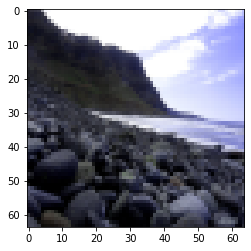

Showing 1 index image


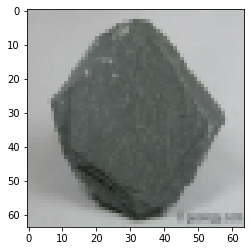

Showing 2 index image


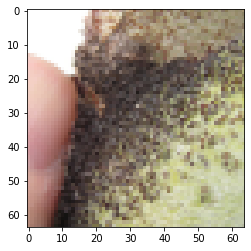

Showing 3 index image


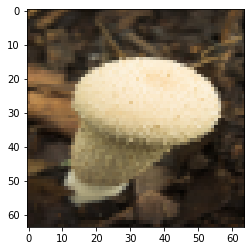

Showing 4 index image


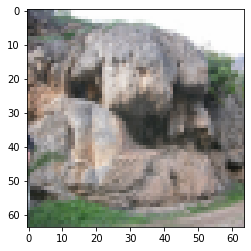

Showing 5 index image


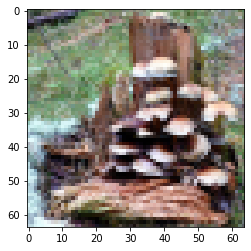

Showing 6 index image


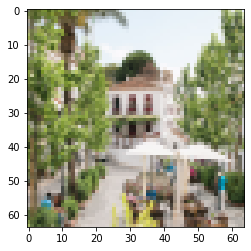

Showing 7 index image


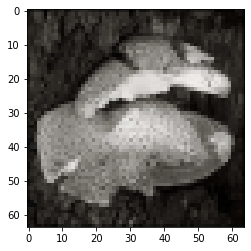

Showing 8 index image


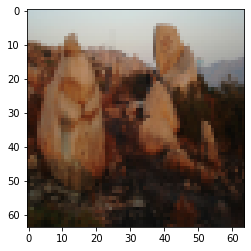

Showing 9 index image


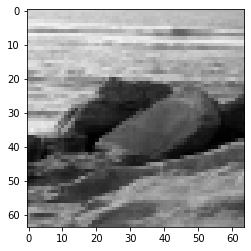

In [134]:
# Show 10 examples of the images, if it's shuffled it shouldn't all be one type

data = allnonflrDat

for i in range(10):
    index = i
    print("Showing %s index image" %(index))
    imgplot = plt.imshow(data[index])
    plt.show()

In [135]:
allflrLbl = np.ones((trflrDat.shape[0]))

In [136]:
allnonflrLbl = np.zeros((allnonflrDat.shape[0]))

In [137]:
print("For the flower and non-flower label datasets:")
print("The shapes are %s, %s" \
      %(allflrLbl.shape, allnonflrLbl.shape))

For the flower and non-flower label datasets:
The shapes are (3130,), (2276,)


In [138]:
trSplit = 0.8
trflr_index = math.floor(trSplit*allflrLbl.shape[0])
trnonflr_index = math.floor(trSplit*allnonflrLbl.shape[0])

print("Indices for %s split is %s and %s" %(trSplit, trflr_index, trnonflr_index))

Indices for 0.8 split is 2504 and 1820


In [139]:
trDat = np.vstack((allflrDat[0:trflr_index,], allnonflrDat[0:trnonflr_index,]))
trLbl = np.concatenate((allflrLbl[0:trflr_index,], allnonflrLbl[0:trnonflr_index,]))
tsDat = np.vstack((allflrDat[trflr_index:,], allnonflrDat[trnonflr_index:,]))
tsLbl = np.concatenate((allflrLbl[trflr_index:,], allnonflrLbl[trnonflr_index:,]))

In [140]:
print("For the training and test datasets:")
print("The shapes are %s, %s, %s, %s" \
      %(trDat.shape, trLbl.shape, tsDat.shape, tsLbl.shape))

For the training and test datasets:
The shapes are (4324, 64, 64, 3), (4324,), (1082, 64, 64, 3), (1082,)


In [141]:
trLbl[trflr_index-2:trflr_index+2]

array([1., 1., 0., 0.])

In [142]:
# np.savez("flrnonflr-train-imgs.npz", trDat)
# np.savez("flrnonflr-train-labels.npz", trLbl)
# np.savez("flrnonflr-test-imgs.npz", tsDat)
# np.savez("flrnonflr-test-labels.npz", tsLbl)

# Extract the training and testing datasets

In [173]:
# Load the data
trDat       = np.load('flrnonflr-train-imgs.npz')['arr_0']
trLbl       = np.load('flrnonflr-train-labels.npz')['arr_0']
tsDat       = np.load('flrnonflr-test-imgs.npz')['arr_0']
tsLbl       = np.load('flrnonflr-test-labels.npz')['arr_0']

In [174]:
print("For the training and test datasets:")
print("The shapes are %s, %s, %s, %s" \
      %(trDat.shape, trLbl.shape, tsDat.shape, tsLbl.shape))

For the training and test datasets:
The shapes are (4324, 64, 64, 3), (4324,), (1082, 64, 64, 3), (1082,)


Showing 3948 index image


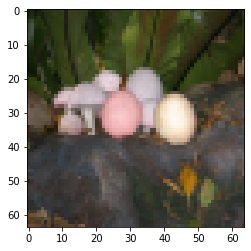

Showing 1697 index image


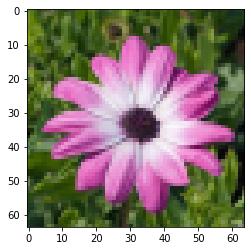

Showing 1405 index image


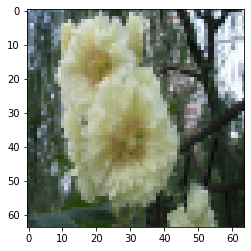

Showing 3919 index image


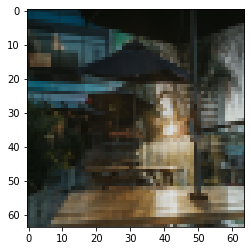

Showing 1973 index image


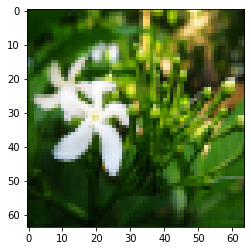

Showing 3528 index image


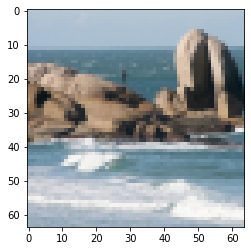

Showing 3112 index image


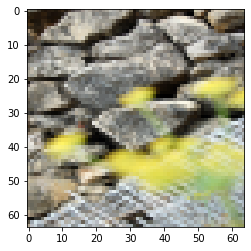

Showing 697 index image


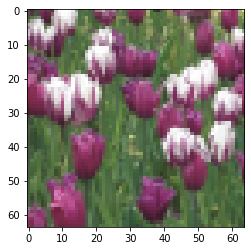

Showing 3652 index image


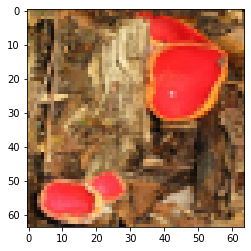

Showing 2164 index image


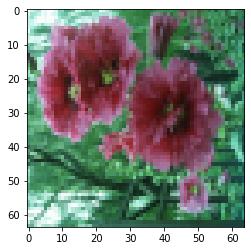

In [177]:
# Randomly show 10 examples of the images

data = trDat

for i in range(10):
    index = random.randint(0, len(data)-1)
    print("Showing %s index image" %(index))
    imgplot = plt.imshow(data[index])
    plt.show()

In [178]:
# Convert the data into 'float32'
# Rescale the values from 0~255 to 0~1
trDat       = trDat.astype('float32')/255
tsDat       = tsDat.astype('float32')/255

# Retrieve the row size of each image
# Retrieve the column size of each image
imgrows     = trDat.shape[1]
imgclms     = trDat.shape[2]
channel     = 3

# # reshape the data to be [samples][width][height][channel]
# # This is required by Keras framework
# trDat       = trDat.reshape(trDat.shape[0], imgrows, imgclms, channel)
# tsDat       = tsDat.reshape(tsDat.shape[0], imgrows, imgclms, channel)

# Perform one hot encoding on the labels
# Retrieve the number of classes in this problem
trLbl       = to_categorical(trLbl)
tsLbl       = to_categorical(tsLbl)
num_classes = tsLbl.shape[1]

In [179]:
# fix random seed for reproducibility
seed = 29
np.random.seed(seed)


modelname = 'FlowerPower'

def createModel():
    inputs = Input(shape=(imgrows, imgclms, channel))
    x = Conv2D(30, (4, 4), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(50, (4, 4), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=[inputs],outputs=x)
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'])
    return model



# Setup the models
model       = createModel() # This is meant for training
modelGo     = createModel() # This is used for final testing

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 61, 61, 30)        1470      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 30, 30, 30)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 27, 27, 50)        24050     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 50)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 13, 13, 50)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 8450)              0         
__________

In [180]:
# Create checkpoint for the training
# This checkpoint performs model saving when
# an epoch gives highest testing accuracy
filepath        = modelname + ".hdf5"
checkpoint      = ModelCheckpoint(filepath, 
                                  monitor='val_acc', 
                                  verbose=0, 
                                  save_best_only=True, 
                                  mode='max')

                            # Log the epoch detail into csv
csv_logger      = CSVLogger(modelname +'.csv')
callbacks_list  = [checkpoint,csv_logger]

In [181]:
# Fit the model
# This is where the training starts
model.fit(trDat, 
          trLbl, 
          validation_data=(tsDat, tsLbl), 
          epochs=60, 
          batch_size=128,
          callbacks=callbacks_list)

Train on 4324 samples, validate on 1082 samples
Epoch 1/60
4324/4324 [==============================] - 7s 2ms/step - loss: 0.6379 - acc: 0.6006 - val_loss: 0.6055 - val_acc: 0.6340
Epoch 2/60
4324/4324 [==============================] - 1s 313us/step - loss: 0.5136 - acc: 0.7433 - val_loss: 0.4806 - val_acc: 0.7597
Epoch 3/60
4324/4324 [==============================] - 1s 309us/step - loss: 0.4324 - acc: 0.8055 - val_loss: 0.3947 - val_acc: 0.8318
Epoch 4/60
4324/4324 [==============================] - 1s 310us/step - loss: 0.4062 - acc: 0.8245 - val_loss: 0.4213 - val_acc: 0.8161
Epoch 5/60
4324/4324 [==============================] - 1s 310us/step - loss: 0.3804 - acc: 0.8430 - val_loss: 0.4269 - val_acc: 0.8161
Epoch 6/60
4324/4324 [==============================] - 1s 310us/step - loss: 0.3585 - acc: 0.8506 - val_loss: 0.3638 - val_acc: 0.8466
Epoch 7/60
4324/4324 [==============================] - 1s 313us/step - loss: 0.3414 - acc: 0.8568 - val_loss: 0.4133 - val_acc: 0.8207
Ep

4324/4324 [==============================] - 1s 309us/step - loss: 0.0440 - acc: 0.9847 - val_loss: 0.6505 - val_acc: 0.8420


In [182]:
# Now the training is complete, we get
# another object to load the weights
# compile it, so that we can do 
# final evaluation on it
modelGo.load_weights(filepath)
modelGo.compile(loss='categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])

In [185]:
# Make classification on the test dataset
predicts    = modelGo.predict(tsDat)

# Prepare the classification output
# for the classification report
predout     = np.argmax(predicts,axis=1)
testout     = np.argmax(tsLbl,axis=1)
labelname   = ['flower', 'non-flower']
                                            # the labels for the classfication report


testScores  = metrics.accuracy_score(testout,predout)
confusion   = metrics.confusion_matrix(testout,predout)


print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,predout,target_names=labelname,digits=4))
print(confusion)

Best accuracy (on testing dataset): 85.67%
              precision    recall  f1-score   support

      flower     0.8322    0.8268    0.8295       456
  non-flower     0.8744    0.8786    0.8765       626

    accuracy                         0.8567      1082
   macro avg     0.8533    0.8527    0.8530      1082
weighted avg     0.8566    0.8567    0.8567      1082

[[377  79]
 [ 76 550]]


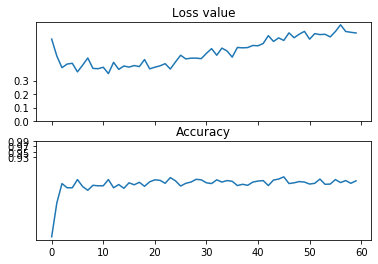

In [186]:
import pandas as pd

records = pd.read_csv(modelname +'.csv')
plt.figure()
plt.subplot(211)
plt.plot(records['val_loss'])
plt.yticks([0.00,0.10,0.20,0.30])
plt.title('Loss value',fontsize=12)

ax = plt.gca()
ax.set_xticklabels([])



plt.subplot(212)
plt.plot(records['val_acc'])
plt.yticks([0.93,0.95,0.97,0.99])
plt.title('Accuracy',fontsize=12)
plt.show()